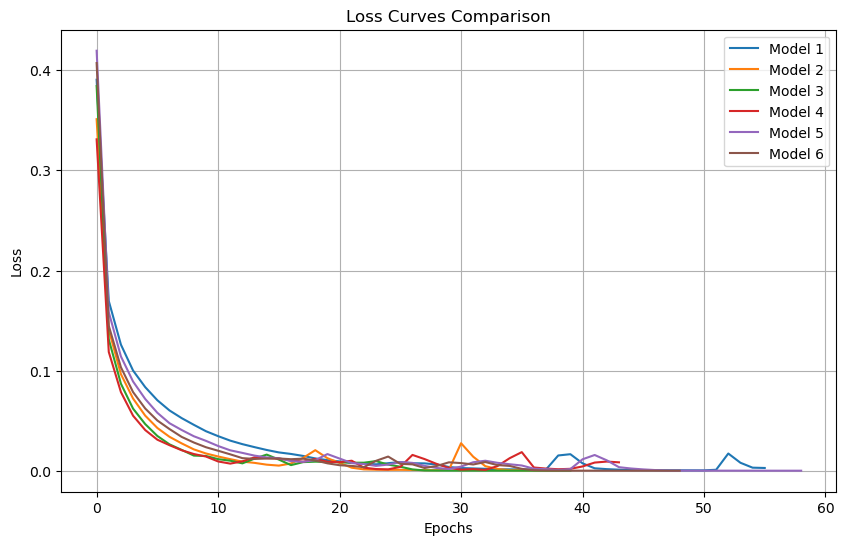

Model 1 Accuracy: 0.97
Model 1 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.96      1027
           8       0.96      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97      9999
   macro avg       0.97      0.97      0.97      9999
weighted avg       0.97      0.97      0.97      9999

Model 2 Accuracy: 0.98
Model 2 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.9

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

y_train = train_data.iloc[:, 0]
X_train = train_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

# different architectures to compare
models = {
    'Model 1': MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42),
    'Model 2': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'Model 3': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    'Model 4': MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42),
    'Model 5': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
    'Model 6': MLPClassifier(hidden_layer_sizes=(50, 100), max_iter=500, random_state=42)
}

loss_curves = {}

# training
for model_name, model in models.items():
    model.fit(X_train, y_train)
    loss_curves[model_name] = model.loss_curve_

# plot
plt.figure(figsize=(10, 6))
for model_name, loss_curve in loss_curves.items():
    plt.plot(loss_curve, label=model_name)

plt.title('Loss Curves Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# evaluation
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))
